    1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation (SD) shows how spread out the data points are around the mean, giving us an idea of the variability in a dataset. It’s calculated by looking at how far each data point is from the mean. A higher SD means the data points are more spread out.

The standard error of the mean (SEM) tells us how accurate the sample mean is as an estimate of the population mean. SEM is based on the SD but adjusts for sample size, getting smaller as the sample size increases, which reflects more confidence in the mean.

Bootstrapping, a resampling technique, can help show the difference between SD and SEM. By resampling the data multiple times, you can calculate both. The SD shows variability within each sample, while the SEM indicates how much the sample means differ across resamples. Since SEM accounts for sample size, it’s usually smaller than SD.

    6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. What is the process of bootstrapping? What is the main purpose of bootstrapping? If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

What is bootstrapping? Bootstrapping is a smart statistical method where, instead of relying on complex calculations, we let the computer do the heavy lifting. Here’s the process: you start with a sample of data, but it might not be enough to fully understand the population. Bootstrapping allows you to simulate having more data. You take your original sample and create new ones by randomly picking data points with replacement (meaning some values may be chosen more than once). You repeat this many times—hundreds or even thousands of times. For each of these new samples, you calculate a statistic like the mean. This helps you understand the variability in your data without collecting more samples.

Why use bootstrapping? The main purpose of bootstrapping is to estimate the variability in your data. It shows how much your sample’s results could change if you were able to take multiple samples. Essentially, it gives you an idea of how uncertain your statistic is and how reliable your sample is for drawing conclusions about the population. It’s especially useful for small or complex datasets because it doesn’t require your data to fit a specific pattern.

    8. Vaccine Data Analysis Assignment


First, I will start by visualizing the change in health scores before and after the vaccine. I will create a Bar graph comparing initial and final health scores for all patients to visualize the distribution. Scatter plot or line plot showing each patient's initial vs. final health score could be another option

Then, I will create Null Hypothesis (H0): There is no effect of the vaccine, meaning the mean difference between the initial and final health scores is zero. Then create Alternative Hypothesis (H1): There is a significant effect of the vaccine, meaning the mean difference is not zero.
    In this case, the null hypothesis is what we are trying to prove against, by finding evidence that N0 cannot be true, I can prove H1 is true.

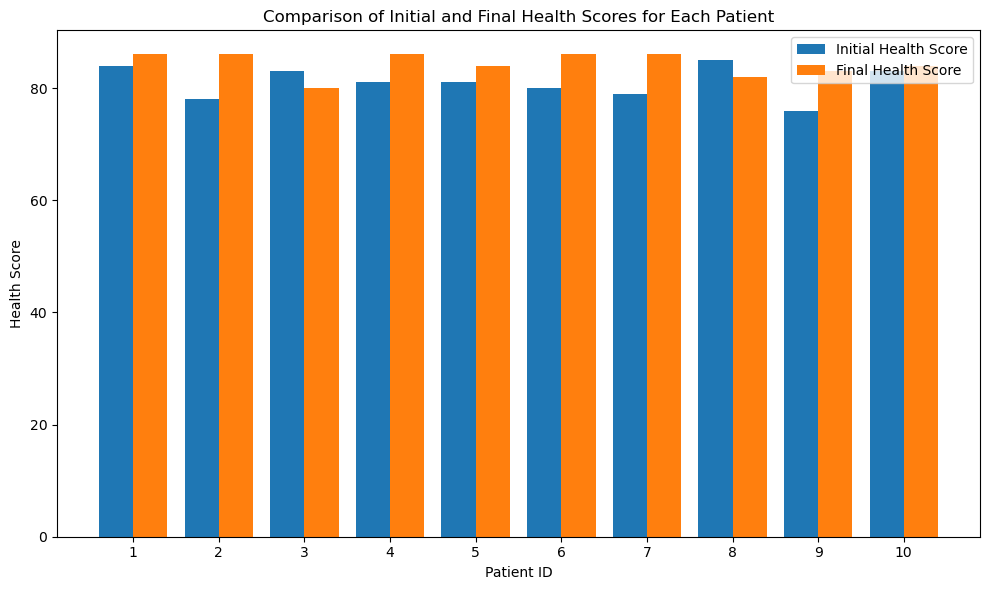

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting bar graph comparing InitialHealthScore and FinalHealthScore for each PatientID
plt.figure(figsize=(10, 6))

# Plot bars for both initial and final scores
plt.bar(df['PatientID'] - 0.2, df['InitialHealthScore'], width=0.4, label='Initial Health Score', align='center')
plt.bar(df['PatientID'] + 0.2, df['FinalHealthScore'], width=0.4, label='Final Health Score', align='center')

# Adding labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores for Each Patient')
plt.xticks(df['PatientID'])  # Ensure Patient IDs are correctly labeled
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Bootstraping analysis: The observed mean difference in health scores is 3.3. The 95% confidence interval for the bootstrapped mean differences is [0.9, 5.5]. Since this interval does not include zero, we can confidently reject the null hypothesis. This indicates that there is statistically significant evidence suggesting the vaccine has a positive effect on health scores.
Visual analysis: From the bar chart comparison, most patients show an improvement in their health scores after vaccination, with some variability between patients

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Provided dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Function to perform bootstrap analysis
def bootstrap(data, num_samples, statistic, alpha=0.05):
    bootstrapped_stats = []
    n = len(data)
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrapped_stats.append(statistic(sample))
    
    # Calculate confidence intervals
    lower_bound = np.percentile(bootstrapped_stats, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrapped_stats, 100 * (1 - alpha / 2))
    
    return np.mean(bootstrapped_stats), lower_bound, upper_bound

# Number of bootstrap samples
num_samples = 1000

# Bootstrap analysis for Initial Health Score
initial_mean, initial_lower, initial_upper = bootstrap(df['InitialHealthScore'], num_samples, np.mean)

# Bootstrap analysis for Final Health Score
final_mean, final_lower, final_upper = bootstrap(df['FinalHealthScore'], num_samples, np.mean)

# Results
print(f'Initial Health Score: Mean = {initial_mean:.2f}, CI = [{initial_lower:.2f}, {initial_upper:.2f}]')
print(f'Final Health Score: Mean = {final_mean:.2f}, CI = [{final_lower:.2f}, {final_upper:.2f}]')

Initial Health Score: Mean = 80.92, CI = [79.20, 82.50]
Final Health Score: Mean = 84.28, CI = [82.90, 85.40]


Since the CI of two dataset doesn't touch, we can say the result is significant in 95% confidence interval

https://chatgpt.com/share/66ff5c71-ca28-8007-a428-23cc7b8afb88
Here's a summary of our conversation:

Data Visualization: You provided a dataset with patients' health scores before and after vaccination and requested a bar graph to compare these scores. I generated the graph and provided the Python code to create it.

Bootstrap Analysis: You asked for bootstrap analysis on the health scores in the dataset. I explained the bootstrap technique and provided a Python code snippet to perform bootstrap analysis, including calculating the mean and confidence intervals for both initial and final health scores.